The Goal here (pun intended) is to design a prediction system which can accurately predict if the home team will win or not. We will use the final dataset got by our earlier "Data Cleaning" Notebook build our prediction model on.

In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
from IPython.display import display

%matplotlib inline

In [3]:
# Read data and drop redundant column.
loc='G:/Projects/Predictor/MyFootball/Dataset'
data = pd.read_csv(loc+'/final_dataset.csv')

# Remove first 3 matchweeks
data = data[data.MW > 3]

data.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)


# Preview data.
data

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
30,H,0.750000,0.000000,L,L,W,L,L,L,-1.000000,-1.000000,0.750000,-12.0
31,H,0.250000,1.750000,D,L,L,D,W,W,-1.000000,0.500000,-1.500000,2.0
32,NH,1.000000,1.000000,L,D,W,D,L,W,-0.250000,0.250000,0.000000,4.0
33,NH,0.750000,1.500000,L,W,L,W,W,L,-0.250000,0.500000,-0.750000,-14.0
34,H,1.750000,1.750000,W,D,W,W,W,D,0.750000,1.250000,0.000000,1.0
35,NH,1.250000,1.250000,D,W,D,D,W,D,0.250000,0.500000,0.000000,-1.0
36,NH,1.000000,2.250000,D,W,L,W,W,W,0.000000,2.500000,-1.250000,0.0
37,H,1.000000,0.000000,D,L,W,L,L,L,0.000000,-1.500000,1.000000,0.0
38,NH,1.000000,0.750000,W,L,D,W,L,L,-0.500000,0.000000,0.250000,-15.0
39,H,0.000000,1.750000,L,L,L,D,W,W,-2.000000,1.000000,-1.750000,2.0


## Data Exploration

In [4]:
# Total number of matches
n_matches = data.shape[0]

# Calculate number of features.
n_features = data.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data[data.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print ("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print ("Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 700
Number of features: 12
Number of matches won by home team: 327
Win rate of home team: 46.71%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000012AD4F0320>,
      dtype=object)

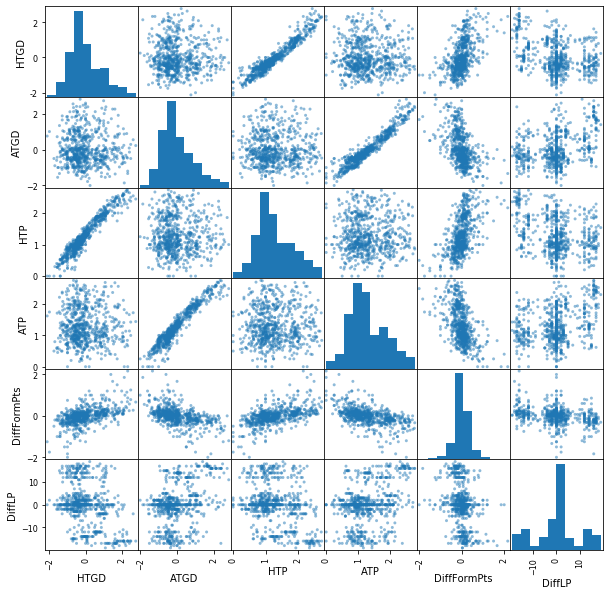

In [5]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix


scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10))

## Preparing the data

In [6]:
# Separate into feature set and target variable
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

# Standardising the data.
from sklearn.preprocessing import scale


cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    


In [7]:
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (24 total features):
['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']


In [8]:
# Show the feature information by printing the first five rows
print ("\nFeature values:")
X_all.head()


Feature values:


,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
30,-0.943395,-2.289685,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,-1.115501,-1.137687,0.75,-1.338524
31,-1.822625,0.799147,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,-1.115501,0.556469,-1.50,0.231310
32,-0.503780,-0.524638,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,-0.271560,0.274109,0.00,0.455572
33,-0.943395,0.357885,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,-0.271560,0.556469,-0.75,-1.562786
34,0.815065,0.799147,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0.853694,1.403546,0.00,0.119179


In [14]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)


## Training and Evaluating Models
Because it a classification problem, I have used the following models for predicting Full Time Results :
1. Logistic Regression
2. Random Foreset
3. SVM
4. XGBoost
For the time being I will be using all these models, irrespective of their fscores and accuracy just to get my hands dirty with all the above mentioned algorithms. I will later pick the best model for my final prediction purposes

In [36]:
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    clf.fit(X_train, y_train)
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    y_pred = clf.predict(features)    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))
    print("\n")


In [52]:
# TODO: Initialize the three models (XGBoost is initialized later)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb 

clf_A = LogisticRegression()
clf_B = RandomForestClassifier()
clf_C = SVC(random_state = 912, kernel='rbf',gamma='scale')
clf_D = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)

train_predict(clf_B, X_train, y_train, X_test, y_test)

train_predict(clf_C, X_train, y_train, X_test, y_test)

train_predict(clf_D, X_train, y_train, X_test, y_test)


Training a LogisticRegression using a training set size of 650. . .
F1 score and accuracy score for training set: 0.6431 , 0.6892.
F1 score and accuracy score for test set: 0.5455 , 0.6000.


Training a RandomForestClassifier using a training set size of 650. . .
F1 score and accuracy score for training set: 0.9788 , 0.9800.


C:\Users\munis_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\munis_000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1 score and accuracy score for test set: 0.5652 , 0.6000.


Training a SVC using a training set size of 650. . .
F1 score and accuracy score for training set: 0.7243 , 0.7692.
F1 score and accuracy score for test set: 0.4390 , 0.5400.


Training a XGBClassifier using a training set size of 650. . .
F1 score and accuracy score for training set: 0.8275 , 0.8492.
F1 score and accuracy score for test set: 0.5366 , 0.6200.




## Hence Random forest is the best model as we can see form its f1 score and accuracy test

In [51]:
instances = X_test.iloc[0].values.reshape(1, -1)
clf_A.predict(instances)

array(['NH'], dtype=object)

# Tuning the parameters of Random Forrest

In [80]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators':[100], 
              'criterion':["gini"],    
              'min_weight_fraction_leaf':[0],  
              'min_impurity_decrease':[0],  
              'verbose':[0]}

# TODO: Initialize the classifier
clf = RandomForestClassifier()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='H')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print (clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test, y_test)
print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
F1 score and accuracy score for training set: 1.0000 , 1.0000.
F1 score and accuracy score for test set: 0.5116 , 0.5800.


In [46]:
instances = X_test.iloc[0].values.reshape(1, -1)
instances

array([[-0.73067793,  1.1265344 ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        -0.71621713,  1.23048749, -0.29032258,  1.91327567]])

In [81]:
clf.predict(instances)

array(['NH'], dtype=object)

# Fitting the model on the whole dataset for future predictions.

In [83]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from pprint import pprint


# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators':[100], 
              'criterion':["gini"],    
              'min_weight_fraction_leaf':[0],  
              'min_impurity_decrease':[0],  
              'verbose':[0]}

# TODO: Initialize the classifier
clf = RandomForestClassifier()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='H')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_all,y_all)

# Get the estimator
clf = grid_obj.best_estimator_
print (clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
F1 score and accuracy score for training set: 1.0000 , 1.0000.


In [1]:
#Predicition
whichTeamWon=X_test.iloc[1].values.reshape(1,-1)
clf.predict(whichTeamWon)

NameError: name 'X_test' is not defined